In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [2]:
tr_file = "../input/ventilator-pressure-prediction/train.csv"
ts_file = "../input/ventilator-pressure-prediction/test.csv"

In [3]:
tr_df = pd.read_csv(tr_file)
tr_df

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1,3.869032
6035996,6035997,125749,50,10,2.537961,1.488497,1,3.869032
6035997,6035998,125749,50,10,2.571408,1.558978,1,3.798729
6035998,6035999,125749,50,10,2.604744,1.272663,1,4.079938


In [4]:
ts_df = pd.read_csv(ts_file)
ts_df

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0
...,...,...,...,...,...,...,...
4023995,4023996,125748,20,10,2.530117,4.971245,1
4023996,4023997,125748,20,10,2.563853,4.975709,1
4023997,4023998,125748,20,10,2.597475,4.979468,1
4023998,4023999,125748,20,10,2.631134,4.982648,1


In [5]:
def calc_index_in_breath(df):
    df = df[["breath_id"]].copy()
    df["one"] = 1
    index_in_breath = df.groupby("breath_id")["one"].cumsum() - 1
    return index_in_breath

tr_df["index_in_breath"] = calc_index_in_breath(tr_df)
ts_df["index_in_breath"] = calc_index_in_breath(ts_df)
tr_df

,id,breath_id,R,C,time_step,u_in,u_out,pressure,index_in_breath
0,1,1,20,50,0.000000,0.083334,0,5.837492,0
1,2,1,20,50,0.033652,18.383041,0,5.907794,1
2,3,1,20,50,0.067514,22.509278,0,7.876254,2
3,4,1,20,50,0.101542,22.808822,0,11.742872,3
4,5,1,20,50,0.135756,25.355850,0,12.234987,4
...,...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1,3.869032,75
6035996,6035997,125749,50,10,2.537961,1.488497,1,3.869032,76
6035997,6035998,125749,50,10,2.571408,1.558978,1,3.798729,77
6035998,6035999,125749,50,10,2.604744,1.272663,1,4.079938,78


## 基礎情報
- 各breath_idの配列長は80固定。吸気フェーズの配列長は25~32。

In [6]:
print("tr unique breath_id", len(tr_df["breath_id"].unique()))
print("ts unique breath_id", len(ts_df["breath_id"].value_counts()))

tr unique breath_id 75450
ts unique breath_id 50300


In [7]:
print("tr seq len", tr_df["breath_id"].value_counts().unique())
print("ts seq len", ts_df["breath_id"].value_counts().unique())

tr seq len [80]
ts seq len [80]


In [8]:
print("tr seq len (u_out==0)", tr_df["breath_id"][tr_df["u_out"] == 0].value_counts().unique())
print("ts seq len (u_out==0)", ts_df["breath_id"][ts_df["u_out"] == 0].value_counts().unique())

tr seq len (u_out==0) [32 31 30 29 28 26 25]
ts seq len (u_out==0) [32 31 30 29 28 25]


In [9]:
print("tr first index u_out==0", tr_df[tr_df["u_out"] == 0].groupby("breath_id")["index_in_breath"].first().unique())
print("ts first index u_out==0", ts_df[ts_df["u_out"] == 0].groupby("breath_id")["index_in_breath"].first().unique())

tr first index u_out==0 [0]
ts first index u_out==0 [0]


In [10]:
print("tr last index u_out==0", tr_df[tr_df["u_out"] == 0].groupby("breath_id")["index_in_breath"].last().unique())
print("ts last index u_out==0", ts_df[ts_df["u_out"] == 0].groupby("breath_id")["index_in_breath"].last().unique())

tr last index u_out==0 [29 28 31 30 27 24 25]
ts last index u_out==0 [30 28 29 31 27 24]


## 値
- R: 5, 20, 50
- C: 10, 20, 50
- u_in: 0~100
- pressure: 0~40ぐらい

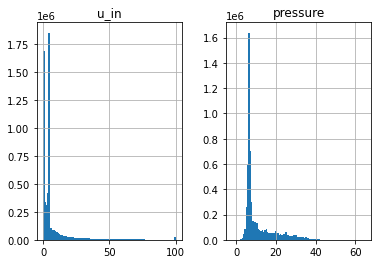

In [11]:
tr_df[["u_in", "pressure"]].hist(bins=100)
plt.show()

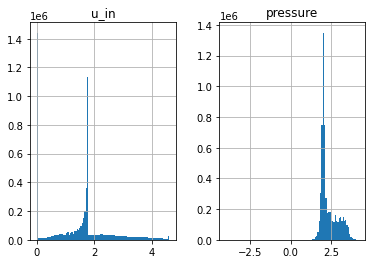

In [12]:
np.log(tr_df[["u_in", "pressure"]] + 1).hist(bins=100)
plt.show()

In [13]:
tr_df[["u_in", "pressure"]].describe()

,u_in,pressure
count,6.036000e+06,6.036000e+06
mean,7.321615e+00,1.122041e+01
std,1.343470e+01,8.109703e+00
min,0.000000e+00,-1.895744e+00
25%,3.936623e-01,6.329607e+00
50%,4.386146e+00,7.032628e+00
75%,4.983895e+00,1.364103e+01
max,1.000000e+02,6.482099e+01


In [14]:
print("R", tr_df["R"].unique(), "C", tr_df["C"].unique())

R [20 50  5] C [50 20 10]


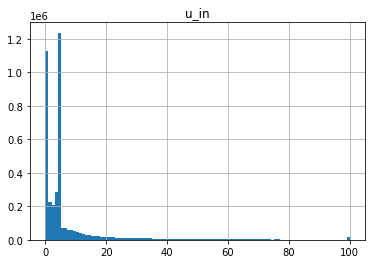

In [15]:
ts_df[["u_in"]].hist(bins=100)
plt.show()

In [16]:
print("R", ts_df["R"].unique(), "C", ts_df["C"].unique())

R [ 5 50 20] C [20 50 10]


In [17]:
r_map = {5: 0, 20:1, 50: 2}
c_map = {10: 0, 20:1, 50: 2}

## dataset split
- R, Cの組み合わせパターンは9とおり。出現頻度にあまり偏りはない。
- breath_idでsplitすれば良さそう。

In [18]:
grdf = tr_df.groupby("breath_id").first()

R = grdf["R"].map(r_map)
C = grdf["C"].map(c_map)
val_R = sorted(R.unique().tolist())
val_C = sorted(C.unique().tolist())

cm = confusion_matrix(R, C)
cm = pd.DataFrame(cm, index=val_R, columns=val_C)
cm.index.name = "R"
cm.columns.name = "C"
cm

C,0,1,2
R,,,
0,8312,8277,8271
1,6070,6208,8186
2,13677,8260,8189


In [19]:
grdf = ts_df.groupby("breath_id").first()

R = grdf["R"].map(r_map)
C = grdf["C"].map(c_map)
val_R = sorted(R.unique().tolist())
val_C = sorted(C.unique().tolist())

cm = confusion_matrix(R, C)
cm = pd.DataFrame(cm, index=val_R, columns=val_C)
cm.index.name = "R"
cm.columns.name = "C"
cm

C,0,1,2
R,,,
0,5437,5451,5447
1,4292,4088,5500
2,9081,5503,5501
